In [0]:
from pandas_datareader import DataReader
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving listings.xlsx to listings (2).xlsx


In [0]:
mx=pd.read_excel('listings.xlsx',sheet_name='amex',na_values='n/a')

In [0]:
naz=pd.read_excel('listings.xlsx',sheet_name='nasdaq',na_values='n/a')

In [0]:
nys=pd.read_excel('listings.xlsx',sheet_name='nyse',na_values='n/a')

In [0]:
listings=pd.read_excel('listings.xlsx',sheet_name=['nyse','nasdaq','amex'],na_values='n/a')

In [0]:
mx['MC']=mx['MarketCap'].div(1e6)

In [0]:
mx_bsec=mx.groupby('Sector')

In [9]:
mx_bsec

In [10]:
mx_bsec.MC.agg(['size','mean']).sort_values('size')

,size,mean
Sector,,
Transportation,1,262.736349
Consumer Durables,3,327.490153
Miscellaneous,5,138.909328
Public Utilities,6,6489.342855
Consumer Non-Durables,9,125.178365
Technology,17,70.454492
Finance,18,525.004340
Capital Goods,20,63.545584
Energy,24,1060.425075


In [11]:
mx_bsec.MC.agg({'o':'size','avg':'mean'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,o,avg
Sector,,
Basic Industries,48,346.947840
Capital Goods,20,63.545584
Consumer Durables,3,327.490153
Consumer Non-Durables,9,125.178365
Consumer Services,26,134.942864
Energy,24,1060.425075
Finance,18,525.004340
Health Care,44,105.707073
Miscellaneous,5,138.909328


In [12]:
mx_bsec.agg({'MC':'size','IPOyear':'median'})

,MC,IPOyear
Sector,,
Basic Industries,48,2015.0
Capital Goods,20,1997.0
Consumer Durables,3,NaN
Consumer Non-Durables,9,2011.5
Consumer Services,26,2014.0
Energy,24,2017.0
Finance,18,2018.0
Health Care,44,2015.0
Miscellaneous,5,2017.0


In [0]:
mx_by=mx.groupby(['Sector','MarketCap','IPOyear'])

In [14]:
mx_by.MC.mean()

Sector                 MarketCap     IPOyear
Basic Industries       2.328452e+07  2015.0        23.284520
                       3.083109e+07  2014.0        30.831088
                       5.139472e+07  2017.0        51.394719
                       6.361506e+07  2011.0        63.615064
                       7.167269e+07  2015.0        71.672690
                       7.184386e+07  2011.0        71.843864
                       1.904860e+08  2017.0       190.485982
                       2.131111e+08  2018.0       213.111050
                       3.414773e+08  2018.0       341.477294
                       4.444285e+08  2017.0       444.428497
                       1.397757e+09  1993.0      1397.757331
Capital Goods          2.860009e+07  2015.0        28.600093
                       3.608981e+07  1993.0        36.089809
                       4.934174e+07  1997.0        49.341740
                       6.942261e+07  1988.0        69.422612
                       1.896422e+08  199

In [15]:
mcap_y=mx_by.MC.mean()
mcap_y.loc['Technology']

MarketCap     IPOyear
1.667435e+07  2016.0      16.674348
8.674539e+07  1999.0      86.745390
3.376652e+08  1992.0     337.665192
Name: MC, dtype: float64

In [16]:
mcap_y.loc[['Technology','Finance']]

Sector      MarketCap     IPOyear
Finance     0.000000e+00  2017.0        0.000000
                          2018.0        0.000000
            8.575000e+07  2019.0       85.750000
            2.990699e+08  2018.0      299.069908
            4.688932e+09  1996.0     4688.932062
Technology  1.667435e+07  2016.0       16.674348
            8.674539e+07  1999.0       86.745390
            3.376652e+08  1992.0      337.665192
Name: MC, dtype: float64

You can generate more fine-grained summaries of your data by providing a list of columns inside .groupby() and/or applying a statistical method such as .mean() directly to one or more numerical columns.

In [17]:
# Group listings by Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

AttributeError: ignored

In [0]:
index9.svg

The .agg() function allows you to aggregate your data in even more ways by accepting two kinds of arguments. Providing a list of names of statistical methods calculates more than one summary statistic at once, and providing a dictionary where keys are column names and values are statistical methods applies a particular summary statistic to a designated column

In [0]:
# Create market_cap_m
listings['market_cap_m'] = listings['MarketCap'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

In [0]:
script.py> output:
                                         Average       Median  Standard Deviation
    Sector                Exchange                                               
    Basic Industries      amex        391.646249   148.564581          605.307911
                          nasdaq      724.899934   150.385214         1445.544949
                          nyse       9590.514730  2450.240499        24845.469793
    Capital Goods         amex        113.943659    49.596035          161.946636
                          nasdaq     1511.237373   293.801019         4829.846757
                          nyse      10166.901284  3215.112817        20254.615284
    Consumer Durables     amex        234.445870    18.337396          441.813008
                          nasdaq      839.802607   177.593858         1907.604606
                          nyse       5854.121680  2982.585002         8996.673435
    Consumer Non-Durables amex       8868.469007    60.087022        31715.734906
                          nasdaq     3104.051206   229.930660        12998.094858
                          nyse      17798.582072  4701.717926        36608.579658
    Consumer Services     amex        229.955283    44.142866          435.805845
                          nasdaq     5582.344175   524.151914        26492.247636
                          nyse       6766.358336  1784.206237        18693.684539
    Energy                amex       1090.151561    50.963858         4783.382420
                          nasdaq      826.607608   182.427776         1568.869627
                          nyse      12915.331006  1838.883585        36689.704192
    Finance               amex        747.535436   238.609251         1305.761473
                          nasdaq     1044.090205   205.476633         2874.795862
                          nyse      13880.683383  2177.155208        32350.815813
    Health Care           amex        120.015785    42.763595          227.187869
                          nasdaq     1758.709197   173.823325         8767.258744
                          nyse      28562.816767  5879.060322        51863.139849
    Miscellaneous         amex         67.551430    59.131037           39.543554
                          nasdaq     3445.655935   228.096175        11461.047175
                          nyse      18594.165519  3734.555829        50001.908517
    Public Utilities      amex       2676.118962    83.283486         4490.753282
                          nasdaq     2357.865315   378.995786         8729.065471
                          nyse      13412.555407  4087.367768        29139.151978
    Technology            amex         59.552665    39.680756           49.184492
                          nasdaq    10883.434214   600.720995        62279.404522
                          nyse       9790.156572  2077.509267        26136.430839
    Transportation        amex        265.489675   265.489675                 NaN
                          nasdaq     2869.660007   479.777469         6915.407403
                          nyse       8491.577404   798.215734        18281.189502


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

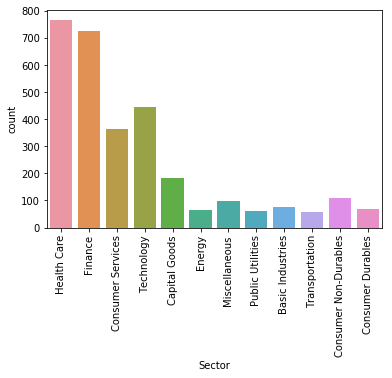

In [18]:
sns.countplot(x='Sector',data=naz)
plt.xticks(rotation = 90)

In [0]:
sec_size=naz.groupby('Sector').size


In [0]:
#order=sec_size.sort_values(ascending=False)
#sec_size.head() not working
#order.head() not working
#order=order.index.tolist()

In [0]:
sns.countplot(x='Sector',data=naz,order=order)
plt.xticks(rotation = 90)
#but it wont work otherwise it will show previous plot in ordered values and ordered chartings

In [0]:
r_ipo=naz[naz['IPOyear']>2014]

In [24]:
r_ipo['IPOyear']=r_ipo['IPOyear'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

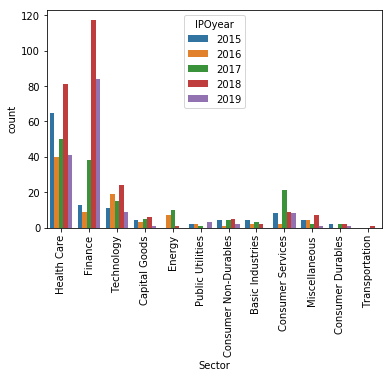

In [27]:
sns.countplot(x='Sector',hue='IPOyear',data=r_ipo)
plt.xticks(rotation =90)

In [35]:
#naz['IPOyear']=naz['IPOyear'].apply(lambda x: 'After 2000' if x>2000 else 'Before 2000')
sns.pointplot(x='Sector',y='MC',hue='IPOyear',data=naz)
plt.xticks(rotation=90)

ValueError: ignored

To create a basic visualization of the number of observations per category in a dataset, the seaborn countplot() function is usually the way to go:

In [37]:
# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

KeyError: ignored

In [0]:
index11.svg

The seaborn barplot() function shows point estimates and confidence intervals as rectangular bars; the default function displays the mean, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:
seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)
  you will use an imported World Bank dataset containing global income per capita data for 189 countries since the year 2000. 

In [0]:
# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [0]:
index12.svg

<script.py> output:
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 2959 entries, 0 to 2958
    Data columns (total 3 columns):
    Country              2959 non-null object
    Year                 2959 non-null int64
    Income per Capita    2959 non-null float64
    dtypes: float64(1), int64(1), object(1)
    memory usage: 69.4+ KB
index12.1.svg

The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:
seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)
you saw a visualization for the market capitalization (the numerical variable) differentiated by whether the IPO (the categorical variable) occurred before (first level) or after (second level) the year 2000.
you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile. 

In [0]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [0]:
index13.svg

In [0]:
mx=pd.read_excel('listings.xlsx',sheet_name='amex',na_values='n/a')

In [0]:
mx['MC']=mx['MarketCap'].div(1e6)

In [0]:
mx=mx[mx.MC > 0]

In [0]:
out=mx.MC.quantile(.9)

In [0]:
mx=mx[mx.MC < out]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

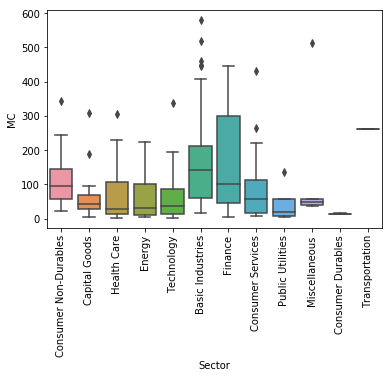

In [44]:
sns.boxplot(x='Sector',y='MC',data=mx)
plt.xticks(rotation=90) # below line is 1st quartile above line is Q3 and line Q2 i.e median total box size = iqr and upper&lower ranges are Q3+1.5*iqr and Q1-1.5*iqr resp + dots as outliers/out

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

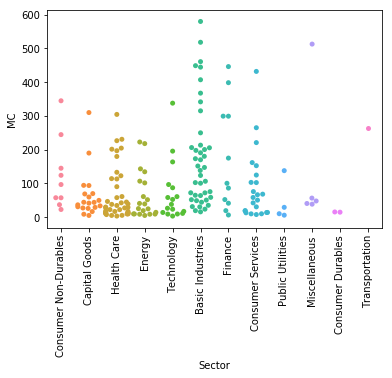

In [47]:
sns.swarmplot(x='Sector',y='MC',data=mx)
plt.xticks(rotation=90)

Finally, the seaborn package includes functions that allow you to visualize the distribution of levels of categorical variables.

In the next two exercises, you will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED.

In [0]:
# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

In [0]:
index14.1+14.2+14.3.svg

<script.py> output:
    <class 'pandas.core.frame.DataFrame'>
    DatetimeIndex: 177 entries, 1960-01-01 to 2018-01-01
    Data columns (total 2 columns):
    Country      177 non-null object
    Inflation    150 non-null float64
    dtypes: float64(1), object(1)
    memory usage: 4.1+ 

As you saw in the video, the boxplot() function displays key quantiles of a distribution with respect to categories, where y represents a quantitative variable, and x a categorical variable. In statistics, this kind of distribution is known as a box-and-whisker plot.

A complement to a box plot is a swarmplot(), which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to boxplot():

seaborn.boxplot(x=None, y=None, data=None, ...)
seaborn.swarmplot(x=None, y=None, data=None, ...)

In this final exercise, you will compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends. 

In [0]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

In [0]:
index15,1 15.2.svg